### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

### Import dataset

In [2]:
df = pd.read_csv('Data/bank/bank-full.csv', sep=';')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

##### Convert conversion (y) metric to numerical values

In [5]:
df['conversion'] = df.apply(lambda x: 0 if x['y'] == 'no' else 1, axis=1)

In [6]:
df['y'].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

### Data QA

In [7]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion']

In [8]:
df.dtypes

age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
y             object
conversion     int64
dtype: object

##### - Conversion Rate

In [9]:
conversion_rate_df = pd.DataFrame((df.groupby('y').count()['conversion'] / df.shape[0]) * 100)

In [10]:
conversion_rate_df.T

y,no,yes
conversion,88.30152,11.69848


##### - Conversion Rates by Marital Status

In [11]:
conversion_rate_by_marital = pd.DataFrame(df.groupby('marital')['conversion'].sum() / df.groupby('marital')['conversion'].count() * 100.0)

In [12]:
conversion_rate_by_marital.T

marital,divorced,married,single
conversion,11.945458,10.123466,14.949179


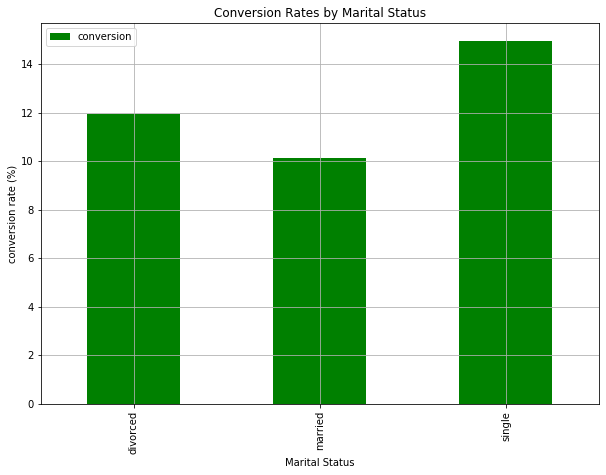

In [13]:
ax = conversion_rate_by_marital.plot(
    kind='bar',
    color='green',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Marital Status'
)

ax.set_xlabel('Marital Status')
ax.set_ylabel('conversion rate (%)')

plt.show()

##### - Conversion Rates by Job

In [14]:
conversion_rate_by_job = df.groupby('job')['conversion'].sum() / df.groupby('job')['conversion'].count() * 100

In [15]:
conversion_rate_by_job

job
admin.           12.202669
blue-collar       7.274969
entrepreneur      8.271688
housemaid         8.790323
management       13.755551
retired          22.791519
self-employed    11.842939
services          8.883004
student          28.678038
technician       11.056996
unemployed       15.502686
unknown          11.805556
Name: conversion, dtype: float64

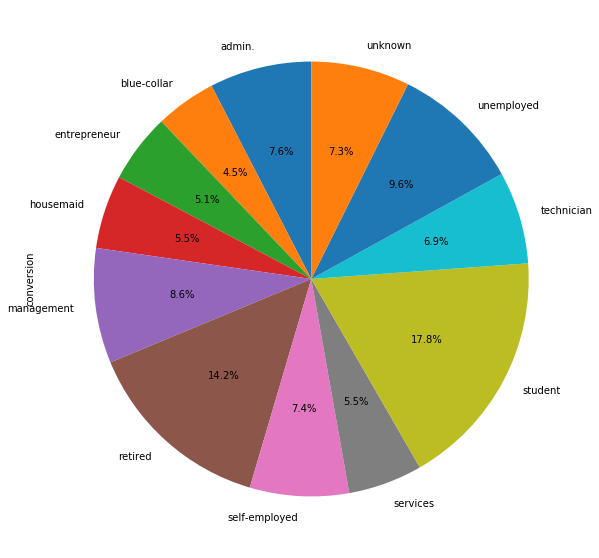

In [16]:
ax = conversion_rate_by_job.plot(
    kind='pie',
    figsize=(20, 10),
    startangle=90,
    subplots=True,
    autopct=lambda x: '%0.1f%%' % x
)

plt.show()

##### - Bank Balance by Conversions

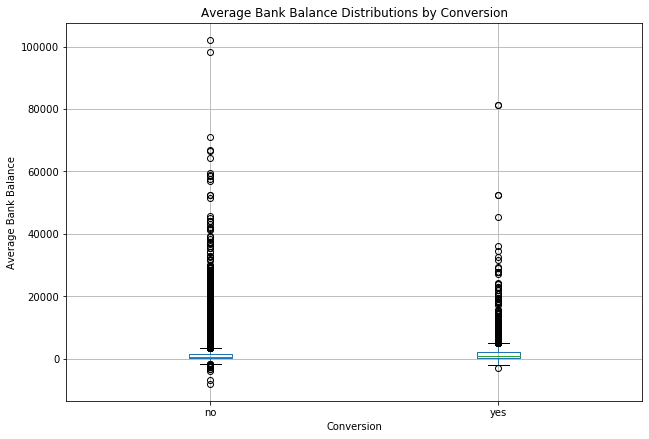

In [17]:
ax = df[['y', 'balance']].boxplot(
    by='y',
    showfliers=True,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

##### Remove Outliers

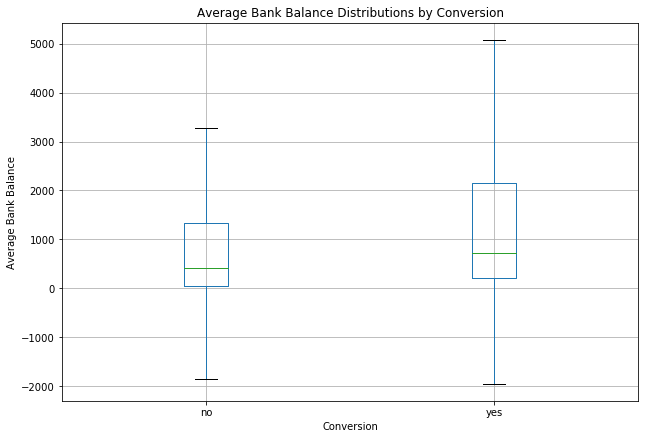

In [18]:
ax = df[['y', 'balance']].boxplot(
    by='y',
    showfliers=False,
    figsize=(10, 7)
)

ax.set_xlabel('Conversion')
ax.set_ylabel('Average Bank Balance')
ax.set_title('Average Bank Balance Distributions by Conversion')

plt.suptitle("")
plt.show()

##### - Conversions Raates by Number of Contact

In [19]:
conversions_rate_by_num_contacts = df.groupby(
    by='campaign'
)['conversion'].sum() / df.groupby(
    by='campaign'
)['conversion'].count() * 100.0

In [20]:
conversions_rate_by_num_contacts

campaign
1     14.597583
2     11.203519
3     11.193624
4      9.000568
5      7.879819
6      7.126259
7      6.394558
8      5.925926
9      6.422018
10     5.263158
11     7.960199
12     2.580645
13     4.511278
14     4.301075
15     4.761905
16     2.531646
17     8.695652
18     0.000000
19     0.000000
20     2.325581
21     2.857143
22     0.000000
23     0.000000
24     5.000000
25     0.000000
26     0.000000
27     0.000000
28     0.000000
29     6.250000
30     0.000000
31     0.000000
32    11.111111
33     0.000000
34     0.000000
35     0.000000
36     0.000000
37     0.000000
38     0.000000
39     0.000000
41     0.000000
43     0.000000
44     0.000000
46     0.000000
50     0.000000
51     0.000000
55     0.000000
58     0.000000
63     0.000000
Name: conversion, dtype: float64

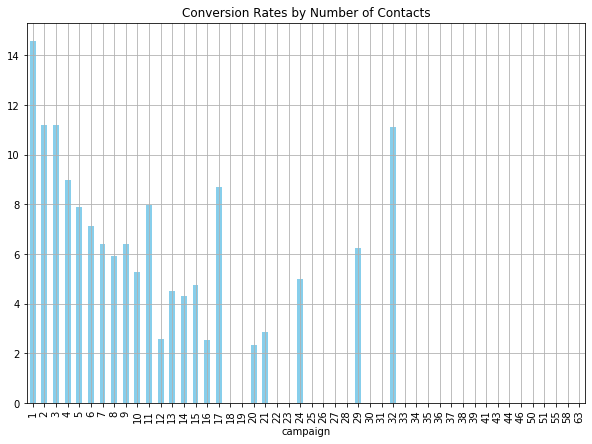

In [21]:
conversions_rate_by_num_contacts.plot(
    kind='bar',
    color='skyblue',
    grid=True,
    figsize=(10, 7),
    title='Conversion Rates by Number of Contacts'
)

ax.set_xlabel('Number of Contacts')
ax.set_ylabel('conversion rate (%)')

plt.show()

### Encode Categorical Variables

In [22]:
column_types_df = pd.DataFrame(df.dtypes, columns=['data_type'])

In [23]:
column_types_df[column_types_df['data_type'] == 'object']

,data_type
job,object
marital,object
education,object
default,object
housing,object
loan,object
contact,object
month,object
poutcome,object
y,object


In [24]:
categorical_vars = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month'
]

In [25]:
df[categorical_vars].nunique()

job          12
marital       3
education     4
default       2
housing       2
loan          2
contact       3
month        12
dtype: int64

##### - Update Month Column

In [26]:
list(df['month'].unique())

['may',
 'jun',
 'jul',
 'aug',
 'oct',
 'nov',
 'dec',
 'jan',
 'feb',
 'mar',
 'apr',
 'sep']

In [27]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

df['month'] = df['month'].apply(
    lambda x: months.index(x)+1
)

In [28]:
df['month'].unique()

array([ 5,  6,  7,  8, 10, 11, 12,  1,  2,  3,  4,  9], dtype=int64)

In [29]:
df.groupby('month').count()['conversion']

month
1      1403
2      2649
3       477
4      2932
5     13766
6      5341
7      6895
8      6247
9       579
10      738
11     3970
12      214
Name: conversion, dtype: int64

##### - Update Job Column

In [30]:
list(df['job'].unique())

['management',
 'technician',
 'entrepreneur',
 'blue-collar',
 'unknown',
 'retired',
 'admin.',
 'services',
 'self-employed',
 'unemployed',
 'housemaid',
 'student']

In [31]:
jobs_encoded_df = pd.get_dummies(df['job'])
jobs_encoded_df.columns = ['job_%s' % x for x in jobs_encoded_df.columns]

In [32]:
jobs_encoded_df.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,1


##### Join Two Datasets

In [33]:
df = pd.concat([df, jobs_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,1,0,0,0,0,0,0,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,0,0,0,1,0,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,0,0,0,0,0,0,0,0,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,0,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,0,0,0,1


##### - Update Marital Status Column

In [34]:
marital_encoded_df = pd.get_dummies(df['marital'])
marital_encoded_df.columns = ['marital_%s' % x for x in marital_encoded_df.columns]

In [35]:
marital_encoded_df.head()

,marital_divorced,marital_married,marital_single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


##### Join Two Datasets

In [36]:
df = pd.concat([df, marital_encoded_df], axis=1)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,0,0,0,0,0,0,1,0,0,1


##### - Update Housing Column

In [37]:
df['housing'].unique()

array(['yes', 'no'], dtype=object)

In [38]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)

##### - Update Loan Column

In [39]:
df['loan'].unique()

array(['no', 'yes'], dtype=object)

In [40]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)

In [41]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single
0,58,management,married,tertiary,no,2143,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
1,44,technician,single,secondary,no,29,1,0,unknown,5,...,0,0,0,0,1,0,0,0,0,1
2,33,entrepreneur,married,secondary,no,2,1,1,unknown,5,...,0,0,0,0,0,0,0,0,1,0
3,47,blue-collar,married,unknown,no,1506,1,0,unknown,5,...,0,0,0,0,0,0,0,0,1,0
4,33,unknown,single,unknown,no,1,0,0,unknown,5,...,0,0,0,0,0,0,1,0,0,1


#### Build a Model

In [42]:
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'conversion',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

In [43]:
features = ['age',
 'balance',
 'campaign',
 'previous',
 'housing',
 'job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown',
 'marital_divorced',
 'marital_married',
 'marital_single']

response_var = 'conversion'

##### Import decision tree model

In [44]:
from sklearn import tree

In [45]:
dt_model = tree.DecisionTreeClassifier(
    max_depth=4
)

In [46]:
dt_model.fit(df[features], df[response_var])

DecisionTreeClassifier(max_depth=4)

In [47]:
dt_model.classes_

array([0, 1], dtype=int64)

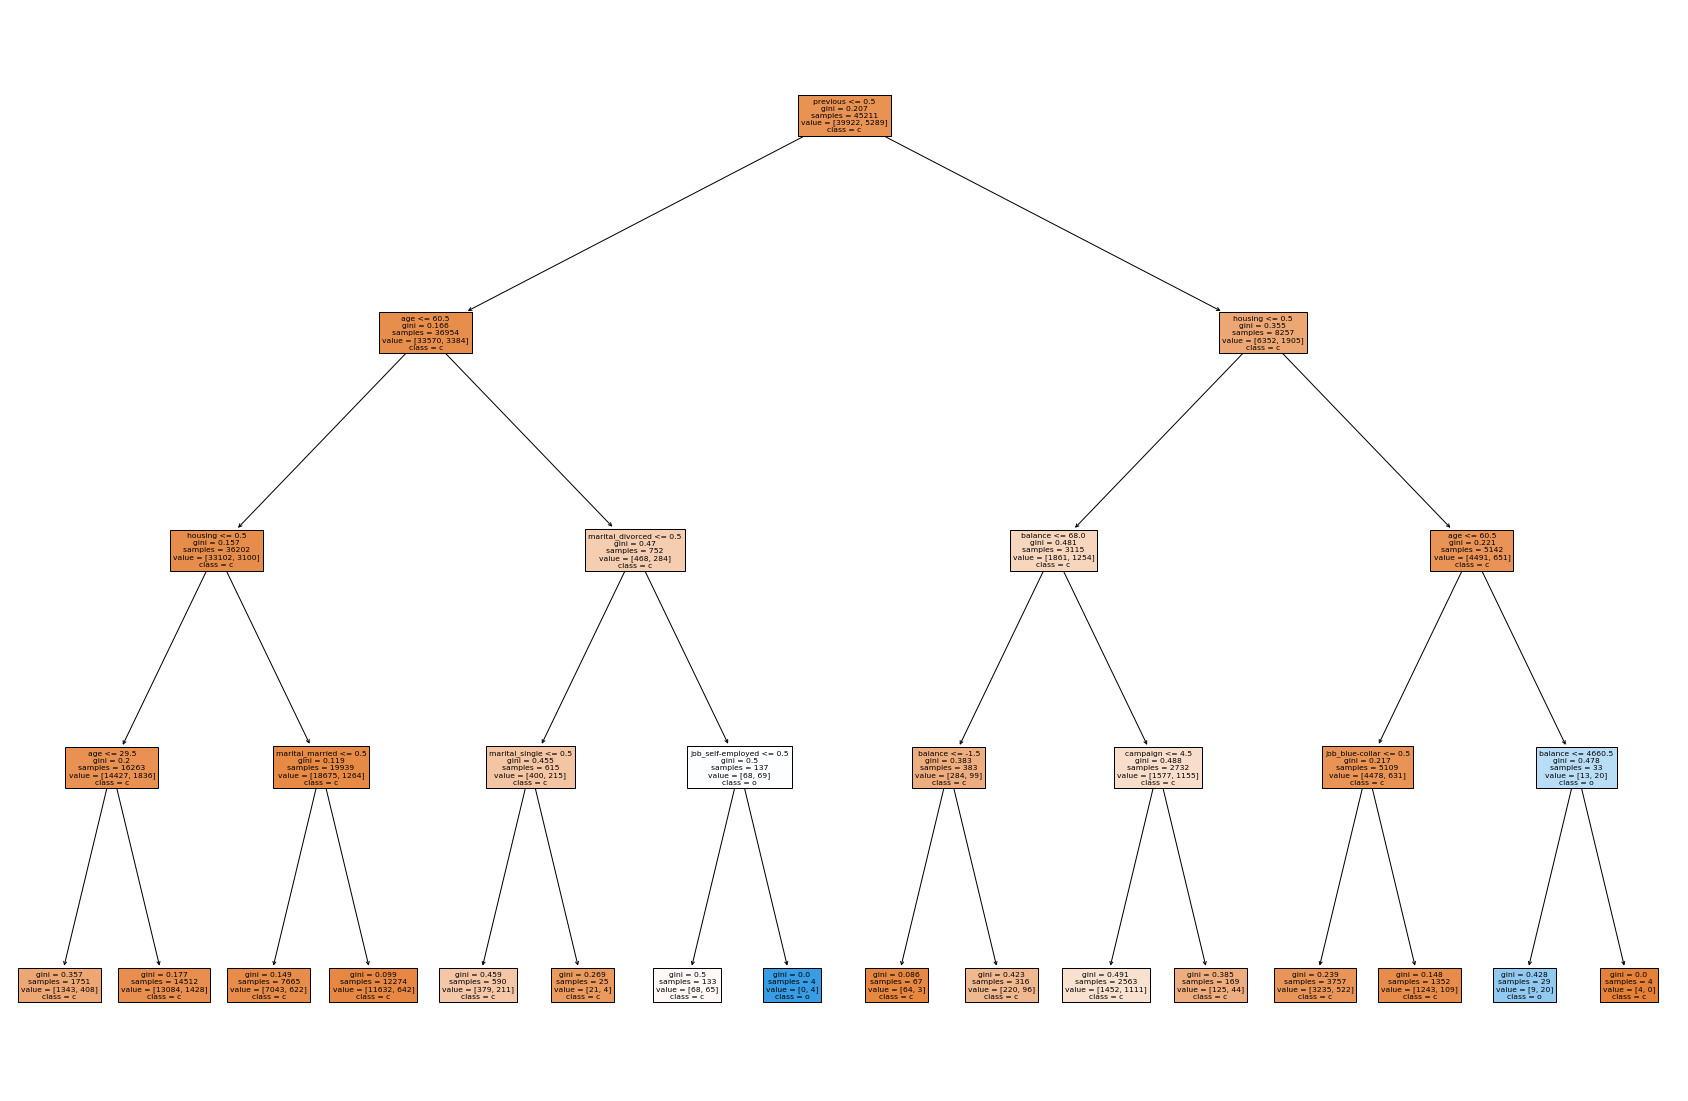

In [48]:
fig = plt.figure(figsize=(30,20))
_ = tree.plot_tree(dt_model, 
                   feature_names=features,  
                   class_names=response_var,
                   filled=True)

#### Summary